In [2]:
# Prueba de set, ejemplo para obtener medidas de una imagen

import cv2 

img = cv2.imread('flores/Flor5_OjoCanario/ejaa0.jpg')
print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
# Importar librerías

import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
# Librerias para red neuronal 

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

In [7]:
# Cargar set de imágenes 

import os
import re
import matplotlib.pyplot as plt

dirname = os.path.join(os.getcwd(),'flores')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\AzucenaRosa 1
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\MargaritaNaranja 10723
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\OjoCanario 8578
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\RaizPlomoAzul 9220
C:\Users\Mark\Videos\Proyecto_CNN_Flores\flores\RosalRojo 8178
Directorios leidos: 5
Imagenes en cada directorio [10724, 8578, 9220, 8178, 10016]
suma Total de imagenes en subdirs: 46716


In [8]:
# Crear etiquetas 

labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  46716


In [9]:
# nombres de clases e indices 

flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 AzucenaRosa
1 MargaritaNaranja
2 OjoCanario
3 RaizPlomoAzul
4 RosalRojo


In [10]:
import numpy as np

# número de clases reconocidas 
y = np.array(labels)

# Inicializa una lista para almacenar las formas de las imágenes
image_shapes = []

# Itera sobre las imágenes y almacena sus formas en la lista
for img in images:
    image_shapes.append(np.array(img).shape)

# Convierte la lista de formas en un array NumPy para facilitar la inspección
image_shapes = np.array(image_shapes)

# Muestra las formas únicas y la frecuencia de cada una
unique_shapes, counts = np.unique(image_shapes, axis=0, return_counts=True)
for shape, count in zip(unique_shapes, counts):
    print(f"Forma: {shape}, Cantidad: {count}")


# Encuentra las ubicaciones de las imágenes con forma [26, 26, 4]
problematic_indices = np.where(np.all(image_shapes == [26, 26, 4], axis=1))[0]

# Muestra las ubicaciones de las imágenes problemáticas
print("Índices de imágenes problemáticas:", problematic_indices)

import matplotlib.pyplot as plt

# Muestra las imágenes problemáticas junto con sus índices
for idx in problematic_indices:
    img = images[idx]
    plt.imshow(img)
    plt.title(f"Índice: {idx}, Forma: {np.array(img).shape}")
    plt.show()

Forma: [26 26  3], Cantidad: 46716
Índices de imágenes problemáticas: []


In [11]:
# número de clases reconocidass 

y = np.array(labels)
X = np.array(images, dtype=np.uint8)

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


In [12]:
# SETS de entrenamiento y TESTs, tamaños de datos de entrenamiento 

train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (37372, 26, 26, 3) (37372,)
Testing data shape :  (9344, 26, 26, 3) (9344,)


Text(0.5, 1.0, 'Ground Truth : 0')

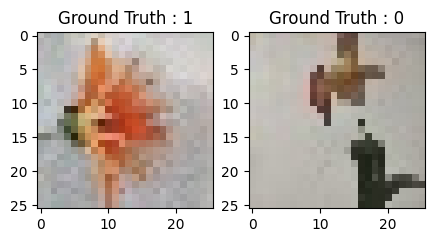

In [13]:
# Ver imagenes de entrenamiento y testing 

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

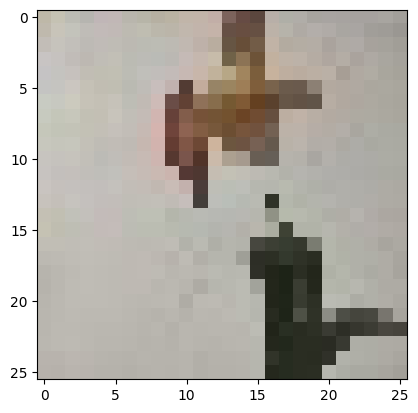

In [14]:
# Preprocesar imagenes 

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

In [15]:
# ONE HOT encoding para red neuronal 

train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]


In [16]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [17]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(29897, 26, 26, 3) (7475, 26, 26, 3) (29897, 5) (7475, 5)


In [18]:
# Crear modelo de CNN 

#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 50 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 32 # cantidad de imágenes que se toman a la vez en memoria

In [19]:
# Caracteristicas de modelo 

flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(26,26,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [20]:
flower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                        

In [21]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [22]:
## Entrenar el modelo para clasificar imágenes

flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/50


935/935 [==============================] - 11s 10ms/step - loss: 1.4114 - accuracy: 0.3914 - val_loss: 1.0622 - val_accuracy: 0.7239
Epoch 2/50
935/935 [==============================] - 9s 9ms/step - loss: 1.0441 - accuracy: 0.6027 - val_loss: 0.7125 - val_accuracy: 0.7908
Epoch 3/50
935/935 [==============================] - 8s 9ms/step - loss: 0.8042 - accuracy: 0.7125 - val_loss: 0.5230 - val_accuracy: 0.8677
Epoch 4/50
935/935 [==============================] - 9s 9ms/step - loss: 0.6609 - accuracy: 0.7740 - val_loss: 0.4110 - val_accuracy: 0.9013
Epoch 5/50
935/935 [==============================] - 9s 9ms/step - loss: 0.5612 - accuracy: 0.8118 - val_loss: 0.3413 - val_accuracy: 0.9195
Epoch 6/50
935/935 [==============================] - 9s 9ms/step - loss: 0.4931 - accuracy: 0.8365 - val_loss: 0.2905 - val_accuracy: 0.9255
Epoch 7/50
935/935 [==============================] - 9s 9ms/step - loss: 0.4378 - accuracy: 0.8547 - val_loss: 0.2532 - val_accuracy: 0.9338
Ep

In [23]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar


flower_model.save("trained/flores3.h5py")

INFO:tensorflow:Assets written to: trained/flores3.h5py\assets


INFO:tensorflow:Assets written to: trained/flores3.h5py\assets


In [25]:
# Evaluar la red naauronal 



test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

292/292 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9800


In [26]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])




Test loss: 0.0611451081931591
Test accuracy: 0.9799871444702148


In [27]:
flower_train.history




{'loss': [1.4113857746124268,
  1.0441192388534546,
  0.8042173385620117,
  0.6608705520629883,
  0.5612409114837646,
  0.49314698576927185,
  0.4378042221069336,
  0.40032997727394104,
  0.36633023619651794,
  0.3395017683506012,
  0.3171499967575073,
  0.30350130796432495,
  0.2843414843082428,
  0.2718923091888428,
  0.25807008147239685,
  0.24945960938930511,
  0.2378634363412857,
  0.23237134516239166,
  0.22359727323055267,
  0.2141938954591751,
  0.20806442201137543,
  0.20615582168102264,
  0.19828464090824127,
  0.19021032750606537,
  0.19010718166828156,
  0.18640312552452087,
  0.1803653985261917,
  0.17528139054775238,
  0.17109572887420654,
  0.1706112027168274,
  0.16633640229701996,
  0.16670051217079163,
  0.1597951352596283,
  0.15812423825263977,
  0.1563686579465866,
  0.1523958295583725,
  0.14903481304645538,
  0.14710956811904907,
  0.14667904376983643,
  0.14508943259716034,
  0.14039738476276398,
  0.1426330953836441,
  0.1375192254781723,
  0.13663484156131744,

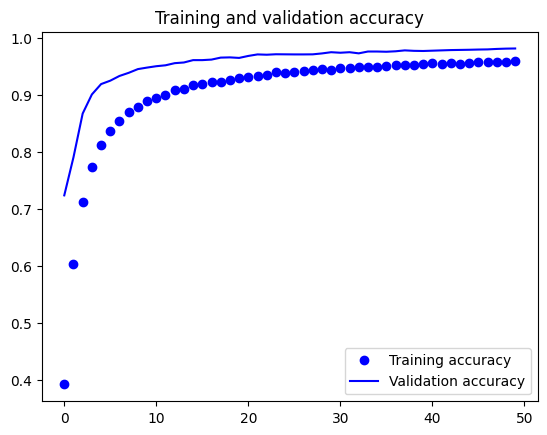

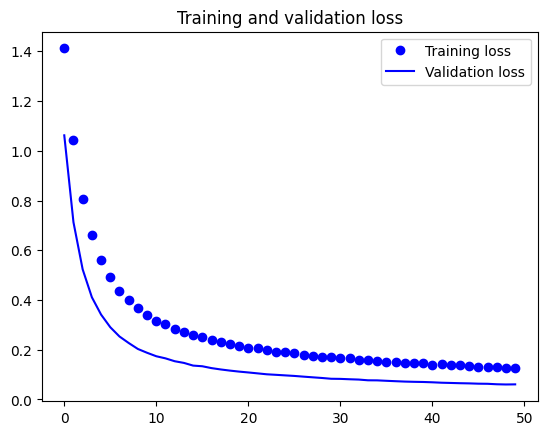

In [28]:
# Verificar tabla de datos 


accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss =flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
predicted_classes2 = flower_model.predict(test_X)

292/292 [==============================] - 1s 3ms/step


In [30]:
predicted_classes=[]
for predicted_flowers in predicted_classes2:
    predicted_classes.append(predicted_flowers.tolist().index(max(predicted_flowers)))
predicted_classes=np.array(predicted_classes)

In [31]:
predicted_classes.shape, test_Y.shape

((9344,), (9344,))

Found 9157 correct labels


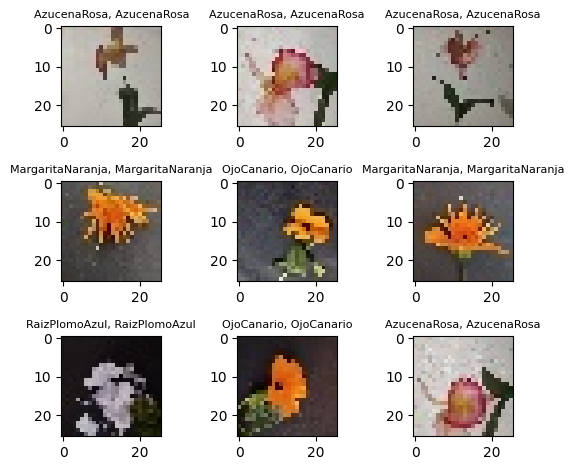

In [32]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none')
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()


Found 187 incorrect labels


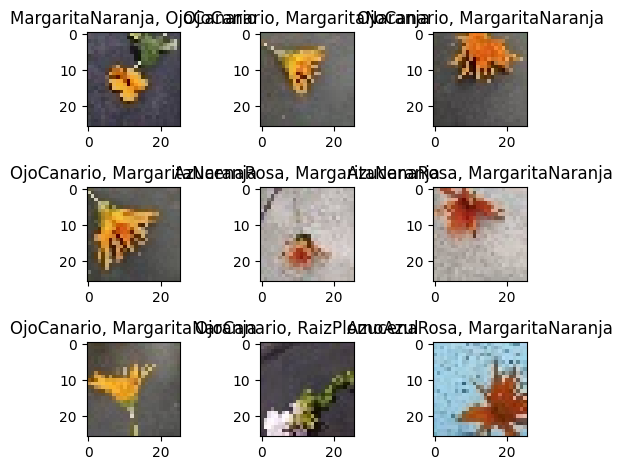

In [33]:
# Etiquetas incorrectas 

incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(26,26,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [34]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99      2094
     Class 1       0.97      0.93      0.95      1706
     Class 2       0.96      0.97      0.97      1848
     Class 3       1.00      0.99      0.99      1711
     Class 4       1.00      1.00      1.00      1985

    accuracy                           0.98      9344
   macro avg       0.98      0.98      0.98      9344
weighted avg       0.98      0.98      0.98      9344



Found 9157 correct labels


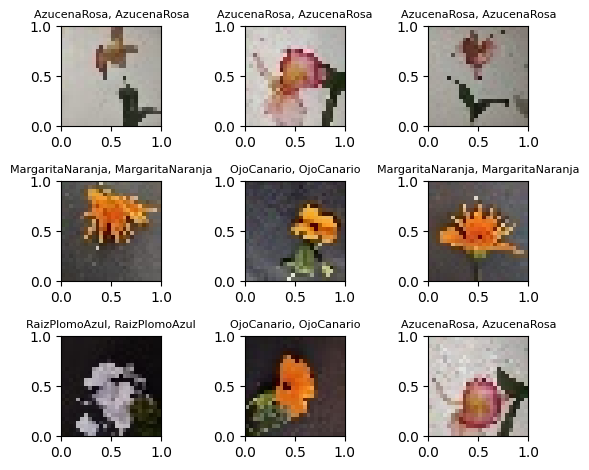

In [35]:
# Etiquetas correctas
correct = np.where(predicted_classes == test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3, 3, i + 1)
    
    # Use extent to control the size of the displayed image
    plt.imshow(test_X[correct].reshape(26, 26, 3), cmap='gray', interpolation='none', extent=[0, 1, 0, 1])
    
    # Use fontsize parameter to set the text size
    plt.title("{}, {}".format(flores[predicted_classes[correct]], flores[test_Y[correct]]), fontsize=8)

    plt.tight_layout()

# Display the plot
plt.show()